In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
# load the dataset
data = pd.read_csv('final_less_stopwords.csv')

In [3]:
data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-3-2a58f03204e6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")


In [4]:
data.isna().any()

Unnamed: 0    False
text           True
sentiment     False
dtype: bool

In [5]:
data = data.dropna()

In [6]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [7]:
data['text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [8]:
data.to_csv('SuperData.csv')

In [9]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["text"])
sequences = tokenizer.texts_to_sequences(data["text"])

# pad the sequences
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [10]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data["sentiment"], test_size=0.33, random_state=0)

In [11]:
# oversample the minority class (positive examples) using SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [12]:
# create the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test), callbacks=[early_stopping]) #, callbacks=[early_stopping]




Epoch 1/7
21/21 [==============================] - 5s 97ms/step - loss: 0.6620 - accuracy: 0.6722 - val_loss: 0.6333 - val_accuracy: 0.6728
Epoch 2/7
21/21 [==============================] - 2s 74ms/step - loss: 0.5451 - accuracy: 0.7335 - val_loss: 0.5195 - val_accuracy: 0.7187
Epoch 3/7
21/21 [==============================] - 2s 72ms/step - loss: 0.3907 - accuracy: 0.8368 - val_loss: 0.4287 - val_accuracy: 0.8104
Epoch 4/7
21/21 [==============================] - 1s 71ms/step - loss: 0.2134 - accuracy: 0.9416 - val_loss: 0.3397 - val_accuracy: 0.8807
Epoch 5/7
21/21 [==============================] - 2s 72ms/step - loss: 0.1144 - accuracy: 0.9581 - val_loss: 0.3572 - val_accuracy: 0.8318
Epoch 6/7
21/21 [==============================] - 2s 72ms/step - loss: 0.0788 - accuracy: 0.9835 - val_loss: 0.2909 - val_accuracy: 0.8960
Epoch 7/7
21/21 [==============================] - 2s 72ms/step - loss: 0.0523 - accuracy: 0.9910 - val_loss: 0.2976 - val_accuracy: 0.8899


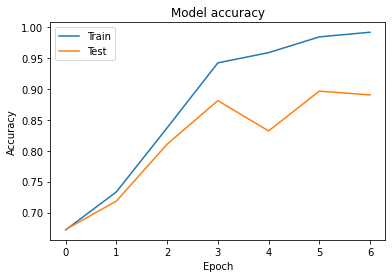

In [15]:
# visualize the accuracy and loss of the training and test sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


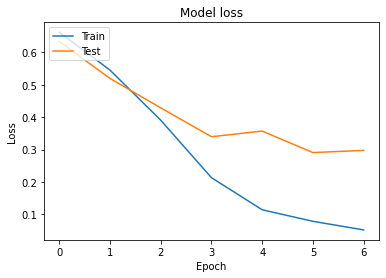

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
# create the LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(1, activation='sigmoid'))

In [18]:
# compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# train the model
early_stopping2 = EarlyStopping(monitor='val_loss', patience=2)
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test), callbacks=[early_stopping]) #


Epoch 1/7
21/21 [==============================] - 5s 80ms/step - loss: 0.6677 - accuracy: 0.6692 - val_loss: 0.6382 - val_accuracy: 0.6820
Epoch 2/7
21/21 [==============================] - 1s 31ms/step - loss: 0.5596 - accuracy: 0.7410 - val_loss: 0.6056 - val_accuracy: 0.6728
Epoch 3/7
21/21 [==============================] - 1s 34ms/step - loss: 0.4275 - accuracy: 0.8114 - val_loss: 0.4552 - val_accuracy: 0.7859
Epoch 4/7
21/21 [==============================] - 1s 31ms/step - loss: 0.2222 - accuracy: 0.9281 - val_loss: 0.3488 - val_accuracy: 0.8685
Epoch 5/7
21/21 [==============================] - 1s 30ms/step - loss: 0.1122 - accuracy: 0.9491 - val_loss: 0.7052 - val_accuracy: 0.6208
Epoch 6/7
21/21 [==============================] - 1s 32ms/step - loss: 0.1414 - accuracy: 0.9491 - val_loss: 0.3511 - val_accuracy: 0.8716


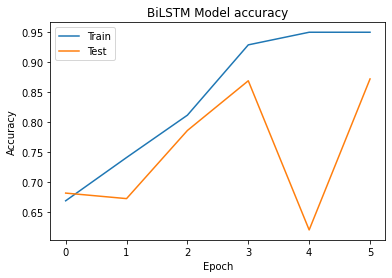

In [20]:
# visualize the accuracy and loss of the training and test sets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('BiLSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


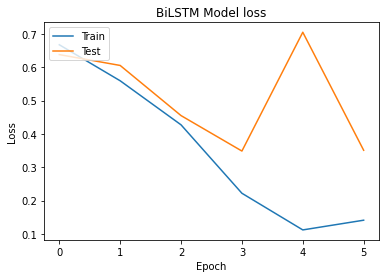

In [21]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('BiLSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [23]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Round the predictions to the nearest class label
predicted_labels = np.round(predictions)

11/11 [==============================] - 0s 10ms/step


In [24]:
# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average='binary')

# Print the results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.9
Recall:  0.8780487804878049
F1-Score:  0.888888888888889


In [25]:
# get the confusion matrix
conf = confusion_matrix(y_test, predicted_labels)
print(conf)

[[147  16]
 [ 20 144]]


In [26]:
# Make predictions on the test data
predictions = model2.predict(X_test)

# Round the predictions to the nearest class label
predicted_labels2 = np.round(predictions)

11/11 [==============================] - 1s 9ms/step


In [27]:
# Calculate precision, recall, f1-score, and support
precision2, recall2, f1_score2, _ = precision_recall_fscore_support(y_test, predicted_labels2, average='binary')

# Print the results
print("Precision: ", precision2)
print("Recall: ", recall2)
print("F1-Score: ", f1_score2)

Precision:  0.9236111111111112
Recall:  0.8109756097560976
F1-Score:  0.8636363636363636


In [28]:
# get the confusion matrix
cf2 = confusion_matrix(y_test, predicted_labels2)
print(cf2)

[[152  11]
 [ 31 133]]
